In [1]:
import tensorflow as tf

2022-11-21 19:24:48.215829: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from Kaggle https://www.kaggle.com/datasets/agrigorev/dino-or-dragon

wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip


In [2]:
# !wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
# !unzip dino-dragon.zip

In [3]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

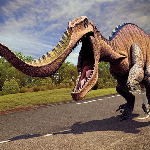

In [4]:
path = "train/dino"
name = "008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg"
fulname = f'{path}/{name}'
load_img(fulname, target_size=(150,150))

In [5]:
from tensorflow.keras import layers, models

input_shape=(150, 150, 3)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-21 19:25:03.353843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:25:03.362485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:25:03.363342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:25:03.364455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [7]:
from tensorflow.keras.optimizers import SGD 

In [8]:
optimizer = SGD(learning_rate=0.002, momentum=0.8)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [11]:
train_ds = train_gen.flow_from_directory(
            './train',
            target_size=(150,150),
            batch_size=20,
            class_mode='binary',
            shuffle=True)


Found 1594 images belonging to 2 classes.


In [12]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [13]:
val_ds = val_gen.flow_from_directory(
            './test',
            target_size=(150,150),
            batch_size=20,
            class_mode='binary',
            shuffle=True)

Found 394 images belonging to 2 classes.


In [14]:
loss = keras.losses.BinaryCrossentropy()

In [15]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
    )

Epoch 1/10


2022-11-21 19:25:30.572496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-21 19:25:31.226125: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 19:25:31.227090: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 19:25:31.227137: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-21 19:25:31.228093: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 19:25:31.228173: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 108ms/step - loss: 0.6601 - accuracy: 0.5897 - val_loss: 0.6125 - val_accuracy: 0.6117
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.5146 - accuracy: 0.7509 - val_loss: 0.4455 - val_accuracy: 0.8274
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.4107 - accuracy: 0.8269 - val_loss: 0.3782 - val_accuracy: 0.8579
Epoch 4/10
80/80 [==============================] - 8s 105ms/step - loss: 0.3541 - accuracy: 0.8620 - val_loss: 0.3425 - val_accuracy: 0.8680
Epoch 5/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3201 - accuracy: 0.8733 - val_loss: 0.3394 - val_accuracy: 0.8528
Epoch 6/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2848 - accuracy: 0.8883 - val_loss: 0.3032 - val_accuracy: 0.8731
Epoch 7/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2659 - accuracy: 0.8996 - val_loss: 0.3116 - val_accuracy: 0.8629
Epoch 8/10
80/80

In [17]:
import numpy as np

In [18]:
median = np.median(history.history['accuracy'])
median

0.8808030188083649

In [19]:
std = np.std(history.history['loss'])
std

0.14280350767757205

In [20]:
train_gen = ImageDataGenerator(rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
train_ds_aug = train_gen.flow_from_directory(
            './train',
            target_size=(150,150),
            batch_size=20,
            class_mode='binary',
            shuffle=True)

Found 1594 images belonging to 2 classes.


In [21]:
history_aug = model.fit(
    train_ds_aug,
    epochs=10,
    validation_data=val_ds
    )

Epoch 1/10
80/80 [==============================] - 15s 190ms/step - loss: 0.4632 - accuracy: 0.7842 - val_loss: 0.4470 - val_accuracy: 0.7817
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4241 - accuracy: 0.8030 - val_loss: 0.3394 - val_accuracy: 0.8528
Epoch 3/10
80/80 [==============================] - 15s 187ms/step - loss: 0.4259 - accuracy: 0.7967 - val_loss: 0.2802 - val_accuracy: 0.8858
Epoch 4/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3828 - accuracy: 0.8369 - val_loss: 0.3393 - val_accuracy: 0.8528
Epoch 5/10
80/80 [==============================] - 15s 190ms/step - loss: 0.3732 - accuracy: 0.8369 - val_loss: 0.3727 - val_accuracy: 0.8325
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 0.3874 - accuracy: 0.8294 - val_loss: 0.2994 - val_accuracy: 0.8629
Epoch 7/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3595 - accuracy: 0.8413 - val_loss: 0.5674 - val_accuracy: 0.7690

In [22]:
mean_val_los = np.mean(history_aug.history['val_loss'])
mean_val_los

0.3894661217927933

In [23]:
test_acc_6_10 = np.average(history_aug.history['accuracy'][5:])
test_acc_6_10

0.8409034013748169